        group          name        result
0    randread  baremetal-4k  21596.968199
1    randread     blk-nosev  14803.704540
2    randread       blk-sev  11443.838128
3    randread    nvme-nosev  15192.350043
4    randread      nvme-sev   8956.676233
5    randread    scsi-nosev  15176.518266
6    randread      scsi-sev   9196.744317
7   randwrite  baremetal-4k  89898.491084
8   randwrite     blk-nosev  13107.200000
9   randwrite       blk-sev  10737.005939
10  randwrite    nvme-nosev  13966.860248
11  randwrite      nvme-sev   9720.557698
12  randwrite    scsi-nosev  12506.273556
13  randwrite      scsi-sev   9683.930550
14       read  baremetal-4k  88592.091923
15       read     blk-nosev  24019.058091
16       read       blk-sev  12937.715921
17       read    nvme-nosev  13695.418212
18       read      nvme-sev  11464.357561
19       read    scsi-nosev  15280.909356
20       read      scsi-sev  12872.280874
21      write  baremetal-4k  86975.447910
22      write     blk-nosev   5315

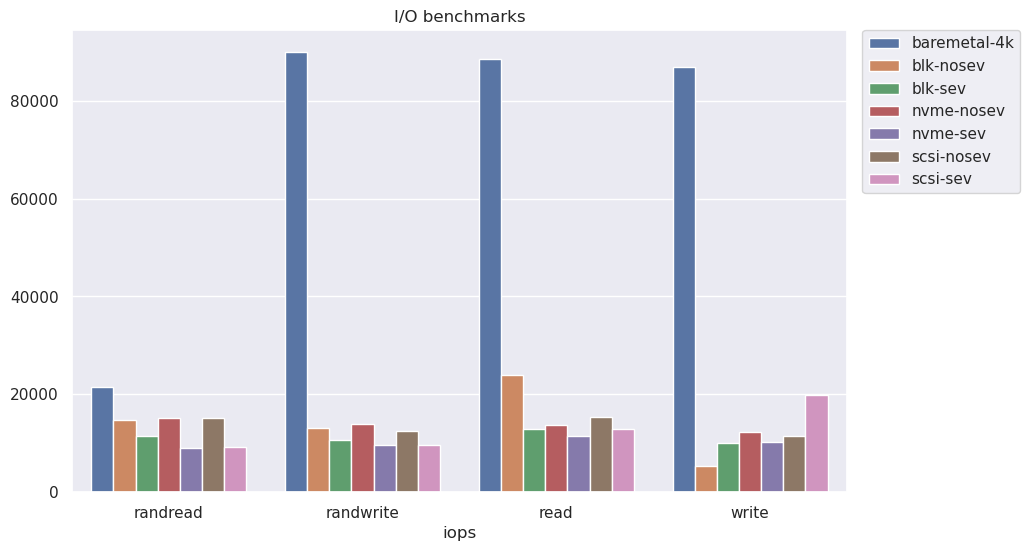

In [1]:
import os
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
from pprint import pprint


df=pd.read_csv("iores.csv")
# df=df.sort_values(["group","name"])
# df=df[df["name"].str.contains("indirect")==False]
# df.to_csv("iomanipres.csv")
print(df)
# df=df.sort_values(by='name')

sns.set(rc={'figure.figsize':(10,6)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8)
ax.set(xlabel ="iops", ylabel = "", title ='I/O benchmarks')
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.yscale("log")
plt.show()

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
sns.set(font_scale=0.5)

sns.set(rc={'figure.figsize':(2,2)})
def plot(filename,title):
    df=pd.read_csv(filename)
    avg_df = df.groupby('benchmark_name')['benchmark_result'].mean().reset_index()
    g1=sns.barplot(data=avg_df,x='benchmark_name', y='benchmark_result',orient="vertical")
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    plt.legend([],[], frameon=False)
    plt.margins(y=1)
    g1.bar_label(g1.containers[0], label_type='edge')
    plt.title(title)
    plt.show()

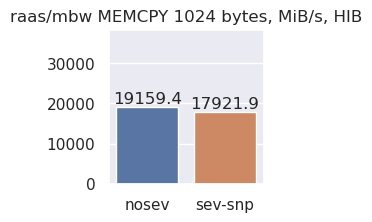

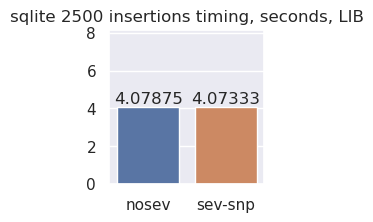

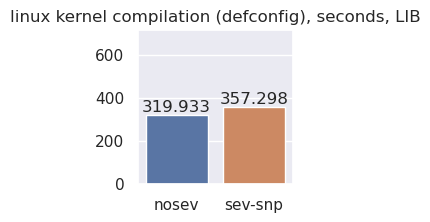

In [11]:
plot("memory.csv","raas/mbw MEMCPY 1024 bytes, MiB/s, HIB")
plot("io.csv","sqlite 2500 insertions timing, seconds, LIB")
plot("compilation.csv","linux kernel compilation (defconfig), seconds, LIB")